In [1]:
# 导入基本包
import numpy as np
import matplotlib.pyplot as plt

# 显示所有过程结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 一、kNN算法实现

### （一）基本原理

Text(1.0, 1.0, '1')

Text(0.9, 1.4, '2')

Text(1.3, 1.0, '3')

Text(1.8, 1.6, '4')

Text(1.6, 1.9, '5')

Text(1.5, 1.5, '6')

Text(2.1, 1.9, '7')

(0.7796637185282114,
 2.6222713741508428,
 0.8789322464683207,
 2.3032585871060753)

Text(0.5, 0, 'X1: 直径')

Text(0, 0.5, 'X2: 厚度')

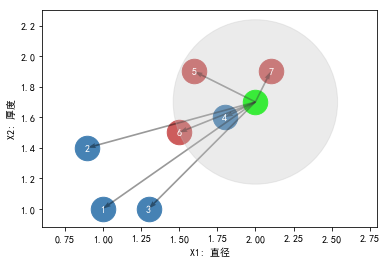

In [2]:
# 导入示范数据
X_samp = np.array([[1.0, 1.0], [0.9, 1.4], [1.3, 1.0], [1.8, 1.6], [1.6, 1.9], [1.5, 1.5], [2.1, 1.9]])  # 样本X
y_samp = np.array([0, 0, 0, 0, 1, 1, 1])  # 样本y
x_to_predict = np.array([2.0, 1.7])  # 预测x

# 生成绘图区域
fig = plt.subplot(1,1,1)

# 绘制样本点与预测点
plt.scatter(X_samp[y_samp == 0, 0], X_samp[y_samp == 0, 1], color='steelblue', s=600)  # 画出y=0的样本点
plt.scatter(X_samp[y_samp == 1, 0], X_samp[y_samp == 1, 1], color='indianred', s=600)  # 画出y=1的样本点
plt.scatter(x_to_predict[0], x_to_predict[1], color='lime', s=600)  # 画出预测点

# 给样本点标记序号
for i in range(len(y_samp)):
    plt.text(x=X_samp[i, 0], y=X_samp[i, 1], s=i+1, ha='center', va='center', color='white')  
    
# 绘制预测点到样本点的距离箭头
for i in range(len(X_samp)):
    plt.quiver(x_to_predict[0],
               x_to_predict[1],
               X_samp[i, 0] - x_to_predict[0],
               X_samp[i, 1] - x_to_predict[1],
               angles = 'xy',
               scale = 1,
               scale_units = 'xy',
               width = 0.005,
               alpha = 0.4)  

# 计算预测点到样本点的欧拉距离
distances = [np.sqrt(np.sum((x - x_to_predict) ** 2)) for x in X_samp]  

# 绘制以预测点为圆心，以离预测点最近的4个点的最大距离为半径，绘制圆形区域，框住的4个样本点即为预测点的4个最近邻
cir1 = plt.Circle(xy = (x_to_predict[0], x_to_predict[1]), radius = np.sort(distances)[3] , alpha = 0.3, color = 'silver') 
fig.add_patch(cir1)  

# 保证绘制出的圆形是正圆
plt.axis('equal')

plt.xlabel('X1: 直径')
plt.ylabel('X2: 厚度')

plt.show()

如上图所示，假如图中反映的是肿瘤患者样本，红色代表恶性（y=1），蓝色代表良性（y=0），两个基本观测特征为X1：直径，X2：厚度。现在有一个新的患者（绿色点），分别观测到两个特征X1：直径和X2：厚度的数据，现在要预测该患者的肿瘤是良性还是恶性。则kNN的基本原理可以解释如下：

求出预测点（绿色点）到样本点的距离（以欧拉距离为例），并找出与预测点最近的k个点（k近邻）的类别，以k个最近邻频率最高的的类别作为预测点的类别。

上图中与预测点最近的4个点（k=4）序号分别为4，5，6，7，这四个点中出现频率最高的类别为恶性（红色：y=1），则这位新患者的肿瘤很大概率上可能是恶性（红色：y=1），则预测绿色点的类别为恶性（红色：y=1）。

#### 欧拉距离

#### 1. 二维平面中点a与点b的距离
$$ 
\sqrt{(x^{(a)}-x^{(b)})^2 + (y^{(a)}-y^{(b)})^2}
$$

#### 2. 三维空间中点a与点b的距离
$$ 
\sqrt{(x^{(a)}-x^{(b)})^2 + (y^{(a)}-y^{(b)})^2 + (z^{(a)}-z^{(b)})^2}
$$

#### 3. n维空间中点a与点b的距离
$$ 
\sqrt{(X_1^{(a)}-X_1^{(b)})^2 + (X_2^{(a)}-X_2^{(b)})^2 + ... + (X_n^{(a)}-X_n^{(b)})^2}
$$

$$ 
即： \sqrt{\sum_{i=1}^{n}(X_i^{(a)}-X_i^{(b)})^2}
$$

### （二）分步实现

In [3]:
# 生成案例样本数据
X_train = np.array([[3.193533211, 2.331273381], 
                    [3.110073483, 1.781539638],
                    [1.343808831, 3.368360954], 
                    [3.582294042, 4.679179110],
                    [2.280362439, 2.866990263], 
                    [7.423436942, 4.696522875],
                    [5.745051997, 3.533989803], 
                    [9.172168622, 2.511101045],
                    [7.792783481, 3.424088941], 
                    [7.939820817, 0.791637231]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

x = np.array([9.093607318, 3.365731514])

X_train
y_train
x

array([[3.19353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

array([9.09360732, 3.36573151])

In [4]:
# 计算预测点x与各个已知点的欧拉距离（语法1）
# 分步拆分计算
X_train[0]
x
X_train[0] - x
(X_train[0] - x) ** 2
np.sum((X_train[0] - x) ** 2)
np.sqrt(np.sum((X_train[0] - x) ** 2))

distances = []
for x_train in X_train:
    d = np.sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)
    
distances

array([3.19353321, 2.33127338])

array([9.09360732, 3.36573151])

array([-5.90007411, -1.03445813])

array([34.81087447,  1.07010363])

35.88097809702169

5.990073296464884

[5.990073296464884,
 6.189696362066091,
 7.74979893307318,
 5.665661357127871,
 6.8314748493036825,
 2.1355268041821,
 3.35277997930294,
 0.8582337193500033,
 1.3021321915203017,
 2.8208482177641367]

In [5]:
# 计算预测点x与各个已知点的欧拉距离（语法2）
distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

distances 

[5.990073296464884,
 6.189696362066091,
 7.74979893307318,
 5.665661357127871,
 6.8314748493036825,
 2.1355268041821,
 3.35277997930294,
 0.8582337193500033,
 1.3021321915203017,
 2.8208482177641367]

In [6]:
# 找出k（k=6）近邻
np.sort(distances)
nearest = np.argsort(distances)  # 找到排序前的元素索引
nearest

k = 6
nearest[:k]

topK_y = [y_train[neighbor] for neighbor in nearest[:k]]
topK_y

array([0.85823372, 1.30213219, 2.1355268 , 2.82084822, 3.35277998,
       5.66566136, 5.9900733 , 6.18969636, 6.83147485, 7.74979893])

array([7, 8, 5, 9, 6, 3, 0, 1, 4, 2], dtype=int64)

array([7, 8, 5, 9, 6, 3], dtype=int64)

[1, 1, 1, 1, 1, 0]

In [7]:
# 找出k（k=6）近邻中频率最高的类别
from collections import Counter
votes = Counter(topK_y)  # 分类计数
votes
votes.most_common(1)  # 找出计数排第1的类

Counter({1: 5, 0: 1})

[(1, 5)]

In [8]:
# 预测y
predict_y = votes.most_common(1)[0][0]
predict_y

1

Text(9.172168622, 2.511101045, '7')

Text(7.792783481, 3.424088941, '8')

Text(7.423436942, 4.696522875, '5')

Text(7.939820817, 0.791637231, '9')

Text(5.745051997, 3.533989803, '6')

Text(3.582294042, 4.67917911, '3')

Text(3.193533211, 2.331273381, '0')

Text(3.110073483, 1.781539638, '1')

Text(2.280362439, 2.866990263, '4')

Text(1.343808831, 3.368360954, '2')

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

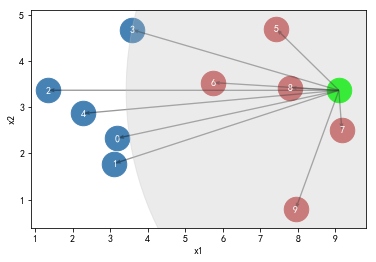

In [9]:
fig = plt.subplot(1,1,1)

# 绘图
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color = 'steelblue', s=600)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color = 'indianred', s=600)
plt.scatter(x[0], x[1], color = 'lime', s=600)

# 给样本点按照距离远近标记序号
for i in nearest:
    plt.text(x=X_train[i, 0], y=X_train[i, 1], s=i, ha='center', va='center', color='white') 

for i in range(len(X_train)):
    plt.quiver(x[0],
               x[1],
               X_train[i, 0] - x[0],
               X_train[i, 1] - x[1],
               angles = 'xy',
               scale = 1,
               scale_units = 'xy',
               width = 0.004,
               alpha = 0.4)
    
cir1 = plt.Circle(xy = (x[0], x[1]), radius = np.sort(distances)[5], alpha = 0.3, color = 'silver') 
fig.add_patch(cir1)

plt.xlabel('x1')
plt.ylabel('x2')
# plt.axis('equal')
plt.show()

### （三）封装（模拟scikit-learn封装逻辑）

In [10]:
import numpy as np
from collections import Counter

class MY_KNNClassifier:
    
    def __init__(self, k):
        '''初始化'''
        assert k >= 1, 'k必须大于等于1'
        
        self.k = k
        self._X_train = None
        self._y_train = None
        
    def fit(self, X_train, y_train):
        '''开始训练'''
        assert X_train.shape[0] == y_train.shape[0], 'X的行数必须与y的行数相等'
        assert X_train.shape[0] >= self.k, 'X的行数必须大于等于k'
        
        self._X_train = X_train
        self._y_train = y_train
        
        return self
    
    def _predict(self, x):
        '''单个预测'''
        assert x.shape[0] == self._X_train.shape[1], '预测的x的列数必须与训练X的列数相等'
        
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for  x_train in self._X_train]
        nearest = np.argsort(distances)
        topK_y = [y_train[neighbor] for neighbor in nearest[:self.k]]
        votes = Counter(topK_y)
        
        return votes.most_common(1)[0][0]
    
    def predict(self, X_predict):
        '''多个预测'''
        assert X_predict.shape[1] == self._X_train.shape[1], '预测的X的列数必须与训练X的列数相等'
        assert self._X_train is not None and self._y_train is not None, '请确保已经完成训练'
        
        y_predict = [self._predict(x) for x in X_predict]
        
        return np.array(y_predict)
    
    '''这里将准确度直接封装到KNN内部，但是需要调用后续的my_accuracy_score，如果按顺序运行会报错，因此注释掉。
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return my_accuracy_score(y_test, y_predict)
        
    '''
    
    def __repr__(self):
        return 'KNN(k={})'.format(self.k)

In [11]:
my_knn = MY_KNNClassifier(k=6)
my_knn.fit(X_train, y_train)
my_knn.predict(x.reshape(1,-1))

KNN(k=6)

array([1])

### （四）scikit - learn 中的 kNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier as S_KNN

s_knn = S_KNN(6)
s_knn.fit(X_train, y_train)

s_knn.predict(x.reshape(1, -1))

KNeighborsClassifier(n_neighbors=6)

array([1])

## 二、训练集与测试集

### （一）分步实现

In [13]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
# iris.DESCR
iris.data.shape
iris.target.shape

(150, 4)

(150,)

In [15]:
X_iris = iris.data
y_iris = iris.target

In [16]:
shuffled_indexes = np.random.permutation(len(X_iris))
shuffled_indexes

array([ 42,   1,  80,  97,  10, 137, 148,  60, 115,  96, 105,  82, 140,
        79,  43, 102, 104,  85,  95, 133,  37,  61,   0, 107, 110, 134,
       123,  99,   2, 143, 146,  35,  54, 144, 142, 129, 109,  29,  78,
       118,  71, 112, 125,  14,  34, 117,  94,  19,  40,  15,  11,  21,
        63,  77,  90,  56,  47,  92,  65, 120,  16, 130,  55,  68,  26,
       114,  52,  39,  81, 128, 106,  70,  45,  44, 122,  74,   6,   8,
       139,  58,  48, 100,  18,  46,  73,  41,  87, 116,  93, 119,  17,
       108,  53,  49,  83,  20,  25,   4,   9, 131,  69,  75,  50,  38,
         3, 111,   7, 126,  88, 121,  23, 147,  33,  24,  31,  28, 113,
        86,  66, 138,   5,  30,  12,  89,  57, 145, 135,  22,  64,  91,
        72, 141,  51, 132, 103,  84,  59,  62,  27, 136, 124,  36,  76,
        13,  32,  98,  67, 101, 149, 127])

In [17]:
test_radio = 0.3
test_size = int(len(X_iris) * test_radio)
test_size 

test_indexes = shuffled_indexes[:test_size]
train_indexes = shuffled_indexes[test_size:]

X_iris_train = X_iris[train_indexes]
y_iris_train = y_iris[train_indexes]

X_iris_test = X_iris[test_indexes]
y_iris_test = y_iris[test_indexes]

X_iris_train.shape
y_iris_train.shape

X_iris_test.shape
y_iris_test.shape

45

(105, 4)

(105,)

(45, 4)

(45,)

### （二）封装（模拟scikit-learn封装逻辑）

In [18]:
import numpy as np

def my_train_test_split(X, y, test_size=0.2, random_state=None):
    '''将X, y 按照test_radio切分成训练集（X_train、y_train）和测试集（X_test、y_test）'''
    assert X.shape[0] == y.shape[0], 'X的行数必须与y的行数相等'
    assert 0 <= test_radio <= 1.0, 'test_radio必须介于0到1之间'
    
    # 设定随机种子
    if random_state:
        np.random.seed(random_state)
        
    shuffled_indexes = np.random.permutation(len(X))
    test_size = int(len(X) * test_radio)
    train_indexes = shuffled_indexes[test_size:]
    test_indexes = shuffled_indexes[:test_size]
    
    
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = my_train_test_split(X_iris, y_iris, test_size=0.3, random_state=400)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(105, 4)

(45, 4)

(105,)

(45,)

In [20]:
my_knn = MY_KNNClassifier(k=6)
my_knn.fit(X_train, y_train)
y_predict = my_knn.predict(X_test)

# 计算准确度accuracy
accuracy = np.sum(y_predict == y_test)/len(y_test)
accuracy

KNN(k=6)

0.9777777777777777

### （三）scikit - learn 中的 train_test_split

In [21]:
from sklearn.neighbors import KNeighborsClassifier as S_KNN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=400)

s_knn = S_KNN(6)
s_knn.fit(X_train, y_train)
y_predict = s_knn.predict(X_test)

accuracy = np.sum(y_test == y_predict)/len(y_test)
accuracy

KNeighborsClassifier(n_neighbors=6)

0.9777777777777777

## 三、算法评价 - 准确度（Accuracy）

### （一）分步实现

In [22]:
# 数据展示
import sklearn.datasets
digits = datasets.load_digits()

digits.keys()

X_digits = digits.data
y_digits = digits.target

X_digits.shape
y_digits.shape

X_digits[1]
y_digits[1]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

(1797, 64)

(1797,)

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

1

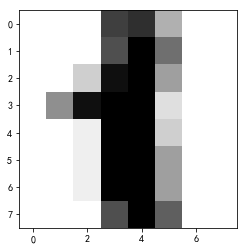

In [23]:
# 绘图
import matplotlib

digits_1_image = X_digits[1].reshape(8,8)
plt.imshow(digits_1_image, cmap=matplotlib.cm.binary)
plt.show()

In [24]:
# 训练并计算准确度
X_train, X_test, y_train, y_test = my_train_test_split(X_digits, y_digits, test_size=0.3, random_state=400)

d_knn = MY_KNNClassifier(6)
d_knn.fit(X_train, y_train)
y_predict = d_knn.predict(X_test)

accuracy = np.sum(y_test == y_predict)/len(y_test)
accuracy

KNN(k=6)

0.9851576994434137

### （二）封装

In [25]:
def my_accuracy_score(y_true, y_predict):
    '''计算准确度'''
    assert y_true.shape[0]== y_predict.shape[0], 'y_true与y_predict的行要相等'
    
    return np.sum(y_true == y_predict)/len(y_test)

In [26]:
my_accuracy_score(y_test, y_predict)

0.9851576994434137

### （三）scikit - learn 中的 accuracy_score

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9851576994434137

## 四、超参数

In [28]:
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier as S_KNN
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=400)

### （一）寻找最优的近邻个数 - n_neighbors参数

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

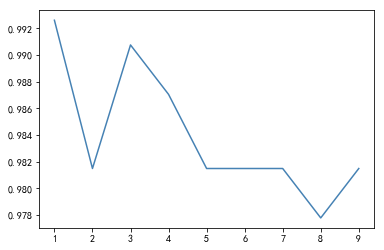

最好的参数k为1
最好的分数为0.9925925925925926


In [29]:
# 寻找最优k
best_score = 0.0
best_k = -1
k_list = []
score_list = []


for k in range(1,10):
    
    s_knn = S_KNN(k)
    s_knn.fit(X_train, y_train)
    score = s_knn.score(X_test, y_test)
    
    k_list.append(k)
    score_list.append(score)
    
    if score > best_score:
        best_score = score
        best_k = k
        
plt.plot(k_list, score_list, color='steelblue')
plt.show()

print('最好的参数k为{}'.format(best_k))
print('最好的分数为{}'.format(best_score))

### （二）是否考虑距离权重 - weights参数

![png](01_pic1.png)

到目前为止，我们在实现kNN算法时，都只考虑了离预测点最近k个样本的类别频率，而忽略了预测点离样本的距离权重。

例如上图中，预测点（绿色点）实际上离4号样本点更近，我们如果完全只考虑类别频率，那么预测点k个近邻中，更多的是恶性样本（红色：y = 1），而忽略了更近的4号样本点（良性 - 蓝色：y = 0），则有可能造成误判。

因此，我们似乎有必要在进行预测时，考虑距离的权重。

scikit - learn 中的kNN为我们提供了选择距离权重的参数weights：不考虑距离权重：'uniform'；考虑距离权重：'distance'

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=1, weights='distance')

KNeighborsClassifier(n_neighbors=2, weights='distance')

KNeighborsClassifier(n_neighbors=3, weights='distance')

KNeighborsClassifier(n_neighbors=4, weights='distance')

KNeighborsClassifier(weights='distance')

KNeighborsClassifier(n_neighbors=6, weights='distance')

KNeighborsClassifier(n_neighbors=7, weights='distance')

KNeighborsClassifier(n_neighbors=8, weights='distance')

KNeighborsClassifier(n_neighbors=9, weights='distance')

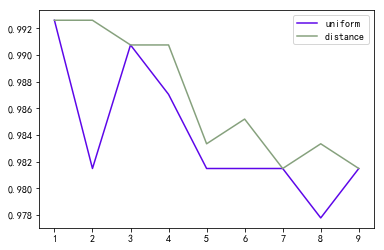

最好的参数k为1
最好的参数weights为'uniform'
最好的分数为0.9925925925925926


In [30]:
# 进一步加入权重搜索
from matplotlib import colors
color_list = [color for color in colors.XKCD_COLORS.values()]

best_score = 0.0
best_k = -1
best_weight = ''
k_list = []
score_list = []

for weight in ['uniform', 'distance']:
    for k in range(1,10):
        s_knn = S_KNN(n_neighbors=k, weights=weight)
        s_knn.fit(X_train, y_train)
        score = s_knn.score(X_test, y_test)
        
        k_list.append(k)
        score_list.append(score)
        
        if score > best_score:
            best_score = score
            best_k = k
            best_weight = weight
                 
    plt.plot(k_list, score_list, color=np.random.choice(color_list), label=weight)
    k_list = []
    score_list = []
        
plt.legend()
plt.show()

print('最好的参数k为{}'.format(best_k))
print('最好的参数weights为\'{}\''.format(best_weight))
print('最好的分数为{}'.format(best_score))

In [31]:
# 拓展 - 将list转化成迭代器
from matplotlib import colors
next(iter([color for color in colors.XKCD_COLORS.values()]))

'#acc2d9'

### （三）明可夫斯基距离 - p参数

对于两点间的距离，有不同的定义：

#### 1、欧拉距离
$$
\sqrt{\sum_{i=1}^{n}(X_i^{(a)}-X_i^{(b)})^2}
$$

$$
即：(\sum_{i=1}^{n}\mid X_i^{(a)}-X_i^{(b)}\mid^2)^{1/2}
$$

#### 2、曼哈顿距离
$$
\sum_{i=1}^{n}\mid X_i^{(a)}-X_i^{(b)}\mid
$$

$$
即：(\sum_{i=1}^{n}\mid X_i^{(a)}-X_i^{(b)}\mid)^{1/1}
$$

#### 3、明可夫斯基距离
$$
(\sum_{i=1}^{n}\mid X_i^{(a)}-X_i^{(b)}\mid^p)^{1/p}
$$

KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

KNeighborsClassifier(p=1, weights='distance')

KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

KNeighborsClassifier(n_neighbors=1, weights='distance')

KNeighborsClassifier(n_neighbors=2, weights='distance')

KNeighborsClassifier(n_neighbors=3, weights='distance')

KNeighborsClassifier(n_neighbors=4, weights='distance')

KNeighborsClassifier(weights='distance')

KNeighborsClassifier(n_neighbors=6, weights='distance')

KNeighborsClassifier(n_neighbors=7, weights='distance')

KNeighborsClassifier(n_neighbors=8, weights='distance')

KNeighborsClassifier(n_neighbors=9, weights='distance')

KNeighborsClassifier(n_neighbors=1, p=3, weights='distance')

KNeighborsClassifier(n_neighbors=2, p=3, weights='distance')

KNeighborsClassifier(n_neighbors=3, p=3, weights='distance')

KNeighborsClassifier(n_neighbors=4, p=3, weights='distance')

KNeighborsClassifier(p=3, weights='distance')

KNeighborsClassifier(n_neighbors=6, p=3, weights='distance')

KNeighborsClassifier(n_neighbors=7, p=3, weights='distance')

KNeighborsClassifier(n_neighbors=8, p=3, weights='distance')

KNeighborsClassifier(n_neighbors=9, p=3, weights='distance')

KNeighborsClassifier(n_neighbors=1, p=4, weights='distance')

KNeighborsClassifier(n_neighbors=2, p=4, weights='distance')

KNeighborsClassifier(n_neighbors=3, p=4, weights='distance')

KNeighborsClassifier(n_neighbors=4, p=4, weights='distance')

KNeighborsClassifier(p=4, weights='distance')

KNeighborsClassifier(n_neighbors=6, p=4, weights='distance')

KNeighborsClassifier(n_neighbors=7, p=4, weights='distance')

KNeighborsClassifier(n_neighbors=8, p=4, weights='distance')

KNeighborsClassifier(n_neighbors=9, p=4, weights='distance')

KNeighborsClassifier(n_neighbors=1, p=5, weights='distance')

KNeighborsClassifier(n_neighbors=2, p=5, weights='distance')

KNeighborsClassifier(n_neighbors=3, p=5, weights='distance')

KNeighborsClassifier(n_neighbors=4, p=5, weights='distance')

KNeighborsClassifier(p=5, weights='distance')

KNeighborsClassifier(n_neighbors=6, p=5, weights='distance')

KNeighborsClassifier(n_neighbors=7, p=5, weights='distance')

KNeighborsClassifier(n_neighbors=8, p=5, weights='distance')

KNeighborsClassifier(n_neighbors=9, p=5, weights='distance')

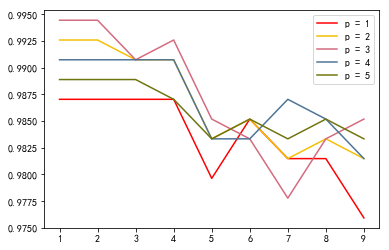

最好的参数k为1
最好的参数p为'3'
最好的分数为0.9944444444444445


In [32]:
# 加入p参数搜索
from matplotlib import colors
color_list = [color for color in colors.XKCD_COLORS.values()]

best_score = 0.0
best_k = -1
best_p = -1
k_list = []
score_list = []

for p in range(1,6):
    for k in range(1,10):
        s_knn = S_KNN(n_neighbors=k, weights='distance', p=p)
        s_knn.fit(X_train, y_train)
        score = s_knn.score(X_test, y_test)
        
        k_list.append(k)
        score_list.append(score)
            
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
            
    plt.plot(k_list, score_list, color=np.random.choice(color_list), label='p = {}'.format(p))
    k_list = []
    score_list = []
        
plt.legend()
plt.show()

print('最好的参数k为{}'.format(best_k))
print('最好的参数p为\'{}\''.format(best_p))
print('最好的分数为{}'.format(best_score))

### （四）超参数搜索 - 网格搜索 - Grid Search

In [33]:
from sklearn.neighbors import KNeighborsClassifier as S_KNN
from sklearn.model_selection import GridSearchCV 

# 定义需要进行搜索的超参数list
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [k for k in range(1,11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [k for k in range(1,11)],
        'p': [p for p in range(1,6)]
    }
]

In [34]:
s_knn = S_KNN()
# 参数n_jobs调用多核处理，提高搜索效率；参数verbose是搜索时能够实时显示搜索信息
grid_search = GridSearchCV(s_knn, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.9s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

In [35]:
# 找出最优超参数组合下的分类器
grid_search.best_estimator_  # 这里得出的最优组合似乎跟我们前文的组合不太一样，原因是因为GridSearchCV采用的是交叉验证方法，后文会详细解释
# 查看最优超参数组合下的得分
grid_search.best_score_  
# 找出最优超参数组合
grid_search.best_params_

# 用最优的分类器进行预测
s_knn = grid_search.best_estimator_
s_knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=4, p=4, weights='distance')

0.9840985265288055

{'n_neighbors': 4, 'p': 4, 'weights': 'distance'}

0.9907407407407407

*其他超参数*

metrics: [http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

## 五、数据归一化

以肿瘤分类为例：

|肿瘤大小（cm）|存在时长（天）|
|--------|--------|
|4|200|
|3|150|
|6|230|
|4|190|

在进行预测时，我们计算的是预测点到各个观测样本点的距离，由于特征“存在时长”数值量级较大，这样就会导致这个距离完全由特征“存在时长”主导了。

因此我们需要对特征“存在时长”进行归一化。

常见的归一化方法有：

#### 1、最值归一化
$$
X_{scale} = \frac{(X-X_{min})}{(X_{max}-X_{min})}
$$

最值归一化适用于边界明显的数据，但是容易受到极端值的影响。

#### 2、均值方差归一化
$$
X_{scale} = \frac{(X-X_{mean})}{X_{std}} 
\\其中：X_{std}为标准差
$$

均值方差归一化将数据归一到均值为0，方差为1的分布中，适用于没有明显边界的数据，不受极端值的影响。

### （一）分步实现

#### 1、最值归一化

In [36]:
# 单个特征
np.random.seed(400)
x = np.random.randint(0, 100, size=100)
x

x_scale = (x - np.min(x))/(np.max(x) - np.min(x))
x_scale 

array([92, 79, 62, 57, 12, 23,  6,  8, 63, 70, 27, 31, 34,  1, 39, 14, 81,
       69, 50, 23, 21, 78,  4, 99, 49, 14, 52, 49, 67, 73, 33, 84, 90, 22,
       29, 44, 76,  1, 37,  5, 37, 36, 67, 74, 88, 46, 64, 33, 84, 84, 53,
        6, 43, 50, 79, 90, 18, 83, 93, 23, 89,  3, 15, 52, 84,  0, 85, 73,
       95, 16, 92, 81, 98, 16, 70, 42, 23, 23, 80, 34, 71, 78, 12, 31, 31,
       42, 72, 80,  3, 84, 30, 87, 90, 77, 32, 58, 17, 90,  2, 37])

array([0.92929293, 0.7979798 , 0.62626263, 0.57575758, 0.12121212,
       0.23232323, 0.06060606, 0.08080808, 0.63636364, 0.70707071,
       0.27272727, 0.31313131, 0.34343434, 0.01010101, 0.39393939,
       0.14141414, 0.81818182, 0.6969697 , 0.50505051, 0.23232323,
       0.21212121, 0.78787879, 0.04040404, 1.        , 0.49494949,
       0.14141414, 0.52525253, 0.49494949, 0.67676768, 0.73737374,
       0.33333333, 0.84848485, 0.90909091, 0.22222222, 0.29292929,
       0.44444444, 0.76767677, 0.01010101, 0.37373737, 0.05050505,
       0.37373737, 0.36363636, 0.67676768, 0.74747475, 0.88888889,
       0.46464646, 0.64646465, 0.33333333, 0.84848485, 0.84848485,
       0.53535354, 0.06060606, 0.43434343, 0.50505051, 0.7979798 ,
       0.90909091, 0.18181818, 0.83838384, 0.93939394, 0.23232323,
       0.8989899 , 0.03030303, 0.15151515, 0.52525253, 0.84848485,
       0.        , 0.85858586, 0.73737374, 0.95959596, 0.16161616,
       0.92929293, 0.81818182, 0.98989899, 0.16161616, 0.70707

In [37]:
# 多个特征
X = np.array(np.random.randint(1,100, size=(50,2)),dtype=float)
X[:5]

X1_scale = (X[:,0] - np.min(X[:,0]))/(np.max(X[:,0]) - np.min(X[:,0]))
X1_scale[:5]

X2_scale = (X[:,1] - np.min(X[:,1]))/(np.max(X[:,1]) - np.min(X[:,1]))
X2_scale[:5]

array([[20., 93.],
       [ 3., 97.],
       [55.,  9.],
       [51., 18.],
       [ 4., 41.]])

array([0.19587629, 0.02061856, 0.55670103, 0.51546392, 0.03092784])

array([0.93877551, 0.97959184, 0.08163265, 0.17346939, 0.40816327])

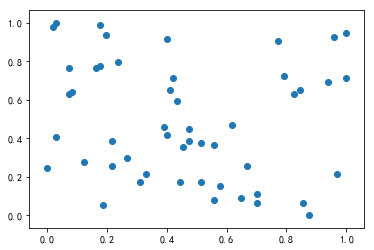

In [38]:
# 绘制散点图
plt.scatter(X1_scale, X2_scale)

#### 2、均值方差归一化

In [39]:
# 多个特征
np.random.seed(400)
X = np.array(np.random.randint(1,100, size=(50,2)),dtype=float)
X[:5]

X1_scale = (X[:,0] - np.mean(X[:,0]))/(np.std(X[:,0]))
X1_scale[:5]

X2_scale = (X[:,1] - np.mean(X[:,1]))/(np.std(X[:,1]))
X2_scale[:5]

array([[93., 80.],
       [63., 58.],
       [13., 24.],
       [ 7.,  9.],
       [64., 71.]])

array([ 1.57607457,  0.5428089 , -1.17930055, -1.38595369,  0.57725109])

array([ 0.8875221 ,  0.15237578, -0.98375943, -1.48499556,  0.58678042])

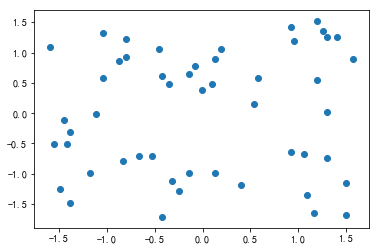

In [40]:
# 绘制散点图
plt.scatter(X1_scale, X2_scale)

In [41]:
np.mean(X1_scale)
np.std(X1_scale)

np.mean(X2_scale)
np.std(X2_scale)

-7.105427357601002e-17

1.0

7.105427357601002e-17

1.0

### （二）封装（以均值方差归一化为例）

#### 1、一个注意事项

在对训练集和测试集进行归一化处理时，要特别注意二者进行归一化的参数要统一，即应该用训练集的相关参数去归一化测试集。

比如，我们在进行均值方差归一化时，首先在训练集上计算出训练集的均值：X_train_mean和标准差：X_train_std，然后对训练集进行归一化。

$$
即：X\_train_{scale} = \frac{(X\_train-X\_train\_mean)}{X\_train\_std} 
$$

在对测试集进行归一化时，我们应该采用在训练集上计算出来的均值：X_train_mean和标准差：X_train_std来对测试集进行归一化。

$$
即：X\_test_{scale} = \frac{(X\_test-X\_train\_mean)}{X\_train\_std} \color {#F00}{(√）} 
$$

$$
而不是：X\_test_{scale} = \frac{(X\_test-X\_test\_mean)}{X\_test\_std} \color {#F00}{(×)}
$$

这样做的原因主要在于：

（1）真实环境中，我们无法获得所有测试数据的均值和标准差；

（2）对数据的归一化也是算法的一部分。

#### 2、封装

In [42]:
import numpy as np

class MY_StandardScaler:
    
    def __init__(self):
        self.mean_ = None
        self.std_ = None
        
    def fit(self, X):
        '''根据训练集获得数据均值和标准差'''
        assert X.ndim == 2, '矩阵必须是二维'
        
        self.mean_ = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
        self.std_ = np.array([np.std(X[:,i]) for i in range(X.shape[1])])
        
        return self
    
    def transform(self, X):
        '''将X进行归一化'''
        assert X.ndim == 2, '矩阵必须是二维'
        assert self.mean_ is not None and self.std_ is not None, '请确保已经完成训练'
        assert X.shape[1] == len(self.mean_), 'X的列数必须与均值和方差的宽度相等'
        
        resX = np.empty(shape=X.shape, dtype=float)
        for col in range(X.shape[1]):
            resX[:,col] = (X[:,col] - self.mean_[col])/self.std_[col]
            
        return resX

array([5.76      , 3.06761905, 3.58      , 1.12380952])

array([0.81036147, 0.46074375, 1.72992706, 0.74572098])

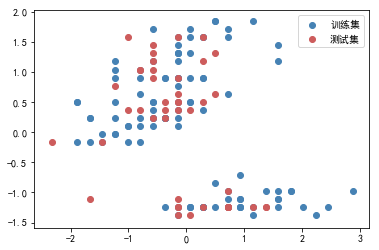

In [43]:
# 应用
from sklearn import datasets
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

X_iris_trian, X_iris_test, y_iris_train, y_iris_test = my_train_test_split(X_iris, y_iris, test_size=0.2, random_state=400)

# fit
my_scaler = MY_StandardScaler()
my_scaler.fit(X_iris_train)

# 查看fit后的“参数”
my_scaler.mean_
my_scaler.std_

# 对训练集进行归一化
X_train_scale = my_scaler.transform(X_iris_trian)
plt.scatter(X_train_scale[:,1], X_train_scale[:,3], c='steelblue', label='训练集')

# 对测试集进行归一化
X_test_scale = my_scaler.transform(X_iris_test)
plt.scatter(X_test_scale[:,1], X_test_scale[:,3], c='indianred', label='测试集')

plt.legend()
plt.show()

### （三）scikit - learn 中的 StandardScaler

StandardScaler()

array([5.76      , 3.06761905, 3.58      , 1.12380952])

array([0.81036147, 0.46074375, 1.72992706, 0.74572098])

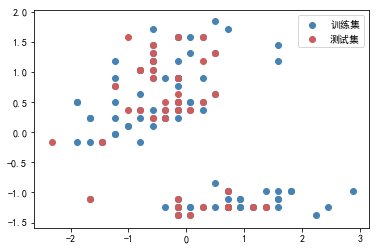

In [44]:
from sklearn.preprocessing import StandardScaler

# fit
s_scaler = StandardScaler()
s_scaler.fit(X_iris_train)

# 查看fit后的“参数”
s_scaler.mean_
s_scaler.scale_

# 对训练集进行归一化
X_train_scale_s = s_scaler.transform(X_iris_train)
plt.scatter(X_train_scale_s[:,1], X_train_scale_s[:,3], c='steelblue', label='训练集')

# 对测试集进行归一化
X_test_scale_s = s_scaler.transform(X_iris_test)
plt.scatter(X_test_scale_s[:,1], X_test_scale_s[:,3], c='indianred', label='测试集')

plt.legend()
plt.show()

## 六、总结

#### 1、基本思想
KNN算法的基本思想是：计算预测点与样本点之间的距离，选取k个近邻中频数最多的类别作为预测点的类别。

#### 2、处理问题
它既能处理分类问题（二分类、多分类），也能处理回归问题。

#### 3、主要优点：
1、思想简单，效果强大；
2、二分类、多分类、回归问题都能解决。

#### 4、主要缺点：
1、训练效率低下。如果训练集有m个样本，n个特征，则预测每一个新的数据，都需要O(m\*n)的时间复杂度（优化：KD-tree、Ball-tree）；

2、高度数据相关。对极端值极为敏感，例如：k = 3时，如果预测点附近出现2个极端值，则就会导致预测错误，极端值会对预测产生较大的错误引导；

3、预测结果可解释性差；

4、维度灾难。随着维度增加，超空间越张越大，导致训练样本在整个超空间中变得极为稀疏，这样就会导致在超空间中抓到的k个近邻，实际上与预测点本身并没有那么“相似”，从而导致预测错误。（参考：https://www.cnblogs.com/datahunter/p/3808252.html）